In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,Callback
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
import numpy as np 


train_dir = r'C:\Users\Leister\Desktop\School\Thesis\Split_Data(60)\train'
valid_dir = r'C:\Users\Leister\Desktop\School\Thesis\Split_Data(60)\valid'
test_dir = r'C:\Users\Leister\Desktop\School\Thesis\Split_Data(60)\test'

In [7]:
# Create ImageDataGenerator instances for training, validation, and test sets
train_datagen = ImageDataGenerator(rescale=1/255)

valid_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

Found 480 images belonging to 8 classes.
Found 160 images belonging to 8 classes.
Found 160 images belonging to 8 classes.


In [8]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 

# Load the MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(8, activation='softmax')(x)  # Assuming 10 classes

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Custom Callback to Save Model Only When Accuracy & Val Accuracy >= 89%
class CustomCheckpoint(Callback):
    def __init__(self, model_path):
        super(CustomCheckpoint, self).__init__()
        self.model_path = model_path
        self.best_acc = 0  # Store the best training accuracy
        self.best_val_acc = 0  # Store the best validation accuracy

    def on_epoch_end(self, epoch, logs=None):
        acc = logs.get('accuracy', 0)
        val_acc = logs.get('val_accuracy', 0)

        # Save model only if both accuracy and validation accuracy are the best seen so far
        if acc >= 0.89 and val_acc >= 0.88:
            if val_acc > self.best_val_acc or (val_acc == self.best_val_acc and acc > self.best_acc):
                self.best_acc = acc  # Update best training accuracy
                self.best_val_acc = val_acc  # Update best validation accuracy
                print(f"\n✅ Saving best model at epoch {epoch + 1} - Accuracy: {acc:.4f}, Val Accuracy: {val_acc:.4f}")
                self.model.save(self.model_path)

# Initialize the custom checkpoint
custom_checkpoint = CustomCheckpoint('mobilenetn60_60e_64bascheck.h5')

# Train the model
history = model.fit(
    train_generator,
    epochs=60,
    validation_data=valid_generator,
    callbacks=[custom_checkpoint]
)



c:\Users\Leister\anaconda3\envs\prediction_model\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.3474 - loss: 6.1303 - val_accuracy: 0.7188 - val_loss: 2.6368
Epoch 2/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.6863 - loss: 3.3570 - val_accuracy: 0.8250 - val_loss: 1.0323
Epoch 3/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.7815 - loss: 1.4019 - val_accuracy: 0.8250 - val_loss: 0.9548
Epoch 4/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.7833 - loss: 1.1756 - val_accuracy: 0.7750 - val_loss: 0.7846
Epoch 5/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.7840 - loss: 0.7607 - val_accuracy: 0.8375 - val_loss: 0.6358
Epoch 6/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.8592 - loss: 0.4812 - val_accuracy: 0.8375 - val_loss: 0.4353
Epoch 7/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.8868 - loss: 0.3766 - val_accuracy: 0.8188 - val_loss: 0.5022
Epoch 8/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.8785 - loss: 0.3752 - val_accuracy: 0.8250 - val_loss: 0.4718
Epoch 9/


✅ Saving best model at epoch 16 - Accuracy: 0.9250, Val Accuracy: 0.9062
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.9390 - loss: 0.1666 - val_accuracy: 0.9062 - val_loss: 0.4101
Epoch 17/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.9318 - loss: 0.2069 - val_accuracy: 0.8687 - val_loss: 0.4744
Epoch 18/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.9148 - loss: 0.2190 - val_accuracy: 0.8500 - val_loss: 0.3947
Epoch 19/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.8975 - loss: 0.3185 - val_accuracy: 0.8625 - val_loss: 0.6043
Epoch 20/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.9264 - loss: 0.2063 - val_accuracy: 0.8875 - val_loss: 0.5890
Epoch 21/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.9452 - loss: 0.2077 - val_accuracy: 0.8938 - val_loss: 0.4396
Epoch 22/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.9354 - loss: 0.2091 - val_accuracy: 0.8750 - val_loss: 0.4901
Epoch 23/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.


✅ Saving best model at epoch 36 - Accuracy: 0.9667, Val Accuracy: 0.9125
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9731 - loss: 0.1732 - val_accuracy: 0.9125 - val_loss: 0.4212
Epoch 37/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9616 - loss: 0.1107


✅ Saving best model at epoch 37 - Accuracy: 0.9667, Val Accuracy: 0.9187
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9622 - loss: 0.1102 - val_accuracy: 0.9187 - val_loss: 0.3288
Epoch 38/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9493 - loss: 0.1456 - val_accuracy: 0.8875 - val_loss: 0.3863
Epoch 39/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9695 - loss: 0.0767 - val_accuracy: 0.9125 - val_loss: 0.2682
Epoch 40/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9658 - loss: 0.1040 - val_accuracy: 0.9125 - val_loss: 0.2972
Epoch 41/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9779 - loss: 0.0987 - val_accuracy: 0.8750 - val_loss: 0.4838
Epoch 42/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9725 - loss: 0.0845 - val_accuracy: 0.8687 - val_loss: 0.5765
Epoch 43/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.9713 - loss: 0.0787 - val_accuracy: 0.8875 - val_loss: 0.6628
Epoch 44/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8941 - loss: 0.5662
Test accuracy: 89.3750011920929
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step


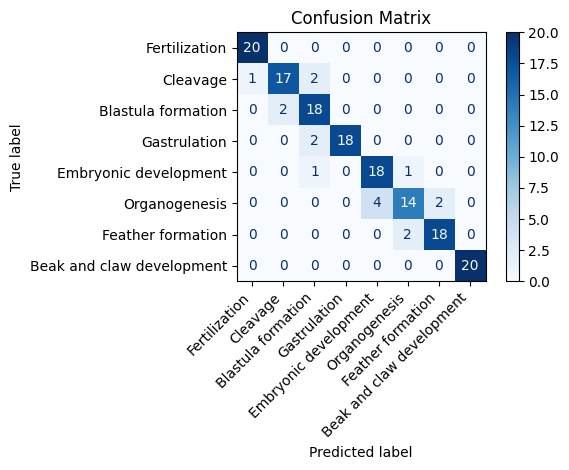

Classification Report:
                           precision    recall  f1-score   support

            Fertilization       0.95      1.00      0.98        20
                 Cleavage       0.89      0.85      0.87        20
       Blastula formation       0.78      0.90      0.84        20
             Gastrulation       1.00      0.90      0.95        20
    Embryonic development       0.82      0.90      0.86        20
            Organogenesis       0.82      0.70      0.76        20
        Feather formation       0.90      0.90      0.90        20
Beak and claw development       1.00      1.00      1.00        20

                 accuracy                           0.89       160
                macro avg       0.90      0.89      0.89       160
             weighted avg       0.90      0.89      0.89       160



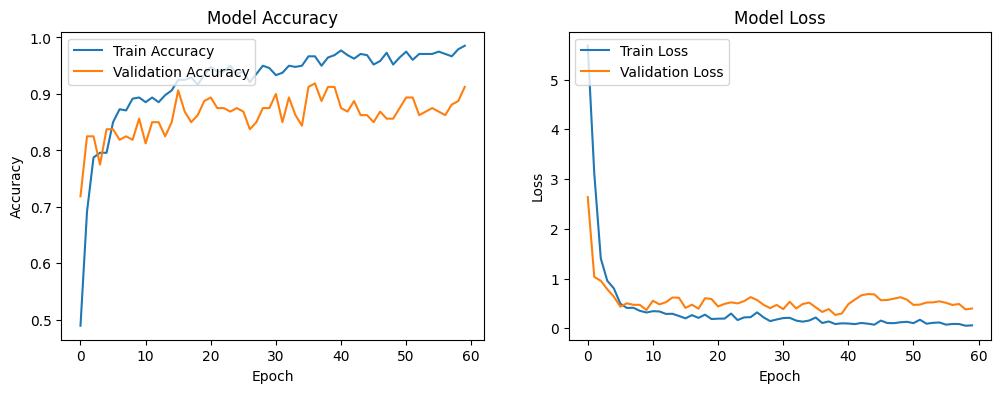

In [10]:
# Evaluate the model
from tensorflow.keras.models import load_model
#best_model = load_model('mobilenetnew60_40e_64ba.h5')

test_loss, test_acc = model.evaluate(test_generator)
acc = test_acc * 100

print(f'Test accuracy: {acc}')


y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred_classes)

# Define the developmental stage labels
developmental_stages = [
    "Fertilization", 
    "Cleavage", 
    "Blastula formation", 
    "Gastrulation", 
    "Embryonic development", 
    "Organogenesis", 
    "Feather formation", 
    "Beak and claw development"
]

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=developmental_stages)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for rotated labels
plt.show()


# Generate classification report
class_labels = list(test_generator.class_indices.keys())
report = classification_report(test_generator.classes, y_pred_classes, target_names=developmental_stages)
print(f'Classification Report:\n{report}')


# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()
model.save('mobile60s_60e_64banew.h5')



In [48]:
# Create ImageDataGenerator instances with enhanced data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Keep validation and test data preprocessing simple
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators with the same parameters
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 574 images belonging to 10 classes.
Found 192 images belonging to 10 classes.
Found 192 images belonging to 10 classes.


In [5]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
# Create ImageDataGenerator instances for training, validation, and test sets
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0
)

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Load the MobileNetV2 model with a slightly higher input resolution
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model - keeping your original approach
for layer in base_model.layers:
    layer.trainable = False

# Keep your successful architecture but with small improvements
x = base_model.output
x = Flatten()(x)  # Keep Flatten since it worked well for you
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile with a slightly lower learning rate
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)  # Lower learning rate for more stable training
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Add simple callbacks to help with training
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

# Train the model - keep most of your training parameters the same
history = model.fit(
    train_generator,
    epochs=50,  # Increase epochs but with early stopping
    validation_data=valid_generator,
    callbacks=[checkpoint, early_stopping]
)

# Optional simple fine-tuning phase
# Only proceed with this if initial training shows promise
print("Initial model accuracy:")
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy:.4f}")

# If test_accuracy >= 87.5%, consider fine-tuning
if test_accuracy >= 0.80:
    print("Starting fine-tuning phase")
    # Only unfreeze a small part of the base model
    for layer in base_model.layers[-10:]:  # Just unfreeze the last 10 layers
        layer.trainable = True
    
    # Recompile with a much lower learning rate
    model.compile(
        optimizer=Adam(learning_rate=0.00005),  # Very low learning rate for fine-tuning
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # Brief fine-tuning
    history_fine = model.fit(
        train_generator,
        epochs=10,
        validation_data=valid_generator,
        callbacks=[checkpoint]
    )
    
    print("Final model accuracy:")
    test_loss, test_accuracy = model.evaluate(test_generator)
    print(f"Test accuracy: {test_accuracy:.4f}")

Found 574 images belonging to 10 classes.
Found 192 images belonging to 10 classes.
Found 192 images belonging to 10 classes.
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 631ms/step - accuracy: 0.3026 - loss: 2.3331
Epoch 1: val_accuracy improved from -inf to 0.72917, saving model to best_model.h5


18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 955ms/step - accuracy: 0.3093 - loss: 2.3062 - val_accuracy: 0.7292 - val_loss: 0.6687
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 628ms/step - accuracy: 0.6956 - loss: 0.8501
Epoch 2: val_accuracy improved from 0.72917 to 0.78125, saving model to best_model.h5


18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 865ms/step - accuracy: 0.6958 - loss: 0.8502 - val_accuracy: 0.7812 - val_loss: 0.6233
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 641ms/step - accuracy: 0.7873 - loss: 0.6234
Epoch 3: val_accuracy improved from 0.78125 to 0.83333, saving model to best_model.h5


18/18 ━━━━━━━━━━━━━━━━━━━━ 16s 874ms/step - accuracy: 0.7877 - loss: 0.6218 - val_accuracy: 0.8333 - val_loss: 0.4833
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 627ms/step - accuracy: 0.8238 - loss: 0.4620
Epoch 4: val_accuracy improved from 0.83333 to 0.83854, saving model to best_model.h5


18/18 ━━━━━━━━━━━━━━━━━━━━ 16s 882ms/step - accuracy: 0.8236 - loss: 0.4614 - val_accuracy: 0.8385 - val_loss: 0.3913
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 715ms/step - accuracy: 0.8581 - loss: 0.3692
Epoch 5: val_accuracy did not improve from 0.83854
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 951ms/step - accuracy: 0.8592 - loss: 0.3673 - val_accuracy: 0.8333 - val_loss: 0.4479
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 720ms/step - accuracy: 0.8817 - loss: 0.3295
Epoch 6: val_accuracy improved from 0.83854 to 0.84896, saving model to best_model.h5


18/18 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.8810 - loss: 0.3306 - val_accuracy: 0.8490 - val_loss: 0.4061
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 637ms/step - accuracy: 0.8965 - loss: 0.2705
Epoch 7: val_accuracy improved from 0.84896 to 0.88542, saving model to best_model.h5


18/18 ━━━━━━━━━━━━━━━━━━━━ 16s 877ms/step - accuracy: 0.8964 - loss: 0.2706 - val_accuracy: 0.8854 - val_loss: 0.3654
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 716ms/step - accuracy: 0.8980 - loss: 0.2756
Epoch 8: val_accuracy did not improve from 0.88542
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 930ms/step - accuracy: 0.8988 - loss: 0.2734 - val_accuracy: 0.8594 - val_loss: 0.4528
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 636ms/step - accuracy: 0.9218 - loss: 0.1998
Epoch 9: val_accuracy did not improve from 0.88542
18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 850ms/step - accuracy: 0.9219 - loss: 0.1996 - val_accuracy: 0.8750 - val_loss: 0.3847
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 747ms/step - accuracy: 0.9436 - loss: 0.1751
Epoch 10: val_accuracy did not improve from 0.88542
18/18 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9437 - loss: 0.1749 - val_accuracy: 0.8750 - val_loss: 0.4189
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 735ms/step - accuracy: 0.9474 - loss: 0.1211
Epoch 11: val_accuracy did not 

In [9]:
# Load the MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(8, activation='softmax')(x)  # Assuming 8 classes

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 18,348,488 (69.99 MB)

 Trainable params: 16,090,504 (61.38 MB)

 Non-trainable params: 2,257,984 (8.61 MB)